In [1]:
import pandas as pd

# Define the column names for the ratings and movies DataFrames
ratings_cols = ["UserID", "MovieID", "Rating", "Timestamp"]
movies_cols = ["MovieID", "Title", "Genres"]

# Read the ratings.dat and  movies.dat file into a DataFrame
ratings_df = pd.read_csv("ratings.dat", sep="::", header=None, names=ratings_cols, engine="python") ##https://stackoverflow.com/questions/50628861/dat-file-import-in-pandas

movies_df = pd.read_csv("movies.dat", sep="::", header=None, names=movies_cols, engine="python")




In [2]:
ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392


In [3]:
movies_df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
#merging the two dataframes
merged_df = pd.merge(ratings_df, movies_df, on="MovieID")
merged_df.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres
0,1,122,5.0,838985046,Boomerang (1992),Comedy|Romance
1,139,122,3.0,974302621,Boomerang (1992),Comedy|Romance
2,149,122,2.5,1112342322,Boomerang (1992),Comedy|Romance
3,182,122,3.0,943458784,Boomerang (1992),Comedy|Romance
4,215,122,4.5,1102493547,Boomerang (1992),Comedy|Romance


In [5]:
len(merged_df)

10000054

# a.	Divide the data to 5 almost equal size files and use the five files in the rest of the assignment 

In [6]:
import numpy as np
split_dfs = np.array_split(merged_df, 5) ##https://predictivehacks.com/?all-tips=how-to-split-a-pandas-dataframe-into-equal-parts

for i, split_df in enumerate(split_dfs):
    print(f"Split {i+1} DataFrame:")
    print(split_df.head()) 


Split 1 DataFrame:
   UserID  MovieID  Rating   Timestamp             Title          Genres
0       1      122     5.0   838985046  Boomerang (1992)  Comedy|Romance
1     139      122     3.0   974302621  Boomerang (1992)  Comedy|Romance
2     149      122     2.5  1112342322  Boomerang (1992)  Comedy|Romance
3     182      122     3.0   943458784  Boomerang (1992)  Comedy|Romance
4     215      122     4.5  1102493547  Boomerang (1992)  Comedy|Romance
Split 2 DataFrame:
         UserID  MovieID  Rating   Timestamp           Title  \
2000011   54365     1653     4.0   995943080  Gattaca (1997)   
2000012   54366     1653     5.0  1108762231  Gattaca (1997)   
2000013   54367     1653     4.0  1228561847  Gattaca (1997)   
2000014   54376     1653     4.5  1228853139  Gattaca (1997)   
2000015   54377     1653     4.0   944984829  Gattaca (1997)   

                        Genres  
2000011  Drama|Sci-Fi|Thriller  
2000012  Drama|Sci-Fi|Thriller  
2000013  Drama|Sci-Fi|Thriller  
2000014

In [7]:
print("Length of each split: \n")
for i, split_df in enumerate(split_dfs):
    print(f"Split {i+1} DataFrame:")
    print(len(split_df)) 

Length of each split: 

Split 1 DataFrame:
2000011
Split 2 DataFrame:
2000011
Split 3 DataFrame:
2000011
Split 4 DataFrame:
2000011
Split 5 DataFrame:
2000010


In [8]:

averaged_dfs = []


for split_df in split_dfs:
    
    averaged_df = split_df.groupby('MovieID')['Rating'].mean().reset_index()
    
    # Merging the averaged ratings back to the original split DataFrame to retain other columns
    averaged_df = averaged_df.merge(split_df.drop(columns=['Rating']), on='MovieID')
    averaged_df = averaged_df.drop_duplicates(subset=['MovieID'])
    averaged_df = averaged_df.reset_index(drop=True)
    
    
    averaged_dfs.append(averaged_df)



In [9]:
for i, averaged_df in enumerate(averaged_dfs):
    print(f"Averaged DataFrame {i+1}:")
    print(averaged_df.head())
    print(len(averaged_df))


Averaged DataFrame 1:
   MovieID    Rating  UserID  Timestamp                     Title  \
0        1  3.928769       5  857911264          Toy Story (1995)   
1        7  3.365017       5  857911357            Sabrina (1995)   
2       21  3.596913       4  844416980         Get Shorty (1995)   
3       25  3.685292       5  857911265  Leaving Las Vegas (1995)   
4       28  4.076039       5  857913507         Persuasion (1995)   

                                        Genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                               Comedy|Romance  
2                          Action|Comedy|Drama  
3                                Drama|Romance  
4                                Drama|Romance  
191
Averaged DataFrame 2:
   MovieID    Rating  UserID   Timestamp  \
0        2  3.208070       8  1115858432   
1        5  3.077435       8  1116550582   
2        6  3.813011       8  1116547028   
3       16  3.749974       8  1115859664   
4       19  2.578199   

# b.	Sort the data from the highest rating movie to the lowest one. Measure how much time sorting takes. 


### Without using built in sort function

In [10]:
def quicksort(df):
    if len(df) <= 1:
        return df
    pivot = df.iloc[len(df) // 2]['Rating']
    left = df[df['Rating'] > pivot]
    middle = df[df['Rating'] == pivot]
    right = df[df['Rating'] < pivot]
    return pd.concat([quicksort(left), middle, quicksort(right)])

In [11]:
#measuring time 
import time
sorted_dfs = []
for i, averaged_df in enumerate(averaged_dfs):
    start_time = time.time()
    sorted_df = quicksort(averaged_df.copy())  # Making a copy to preserve the original 
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Split {i+1} Sorting Time: {elapsed_time:.2f} seconds")
    sorted_dfs.append(sorted_df)

Split 1 Sorting Time: 0.52 seconds
Split 2 Sorting Time: 1.04 seconds
Split 3 Sorting Time: 1.76 seconds
Split 4 Sorting Time: 2.19 seconds
Split 5 Sorting Time: 13.76 seconds


In [12]:
for i, sorted_df in enumerate(sorted_dfs):
    print(f"Sorted DataFrame {i+1}:")
    print(sorted_df.head())


Sorted DataFrame 1:
     MovieID    Rating  UserID   Timestamp  \
109      858  4.415085       2   868245645   
80       527  4.363483       5   857912593   
111      912  4.319741       5   857912791   
139     1221  4.303215       5   857912738   
130     1193  4.292380       6  1001082973   

                                      Title         Genres  
109                   Godfather, The (1972)    Crime|Drama  
80                  Schindler's List (1993)      Drama|War  
111                       Casablanca (1942)  Drama|Romance  
139          Godfather: Part II, The (1974)    Crime|Drama  
130  One Flew Over the Cuckoo's Nest (1975)   Comedy|Drama  
Sorted DataFrame 2:
     MovieID    Rating  UserID   Timestamp                       Title  \
8         50  4.367142       7  1050329529  Usual Suspects, The (1995)   
81       904  4.316544       7  1050098597          Rear Window (1954)   
353     3435  4.315439       7  1049845600     Double Indemnity (1944)   
117     1212  4.31362

### Using Sort function

In [13]:
sorted_dfs_1 = []
for i, averaged_df in enumerate(averaged_dfs):
    start_time = time.time()
    sorted_df_1 = quicksort(averaged_df.copy())  # Making a copy to preserve the original 
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Split {i+1} Sorting Time: {elapsed_time:.2f} seconds")
    sorted_dfs_1.append(sorted_df_1)

Split 1 Sorting Time: 0.42 seconds
Split 2 Sorting Time: 0.96 seconds
Split 3 Sorting Time: 1.71 seconds
Split 4 Sorting Time: 2.67 seconds
Split 5 Sorting Time: 13.69 seconds


In [14]:
for i, sorted_df_1 in enumerate(sorted_dfs_1):
    print(f"Sorted DataFrame {i+1}:")
    print(sorted_df_1.head())


Sorted DataFrame 1:
     MovieID    Rating  UserID   Timestamp  \
109      858  4.415085       2   868245645   
80       527  4.363483       5   857912593   
111      912  4.319741       5   857912791   
139     1221  4.303215       5   857912738   
130     1193  4.292380       6  1001082973   

                                      Title         Genres  
109                   Godfather, The (1972)    Crime|Drama  
80                  Schindler's List (1993)      Drama|War  
111                       Casablanca (1942)  Drama|Romance  
139          Godfather: Part II, The (1974)    Crime|Drama  
130  One Flew Over the Cuckoo's Nest (1975)   Comedy|Drama  
Sorted DataFrame 2:
     MovieID    Rating  UserID   Timestamp                       Title  \
8         50  4.367142       7  1050329529  Usual Suspects, The (1995)   
81       904  4.316544       7  1050098597          Rear Window (1954)   
353     3435  4.315439       7  1049845600     Double Indemnity (1944)   
117     1212  4.31362

### Merging the sorted dataframe

In [15]:
combined_sorted_df = pd.concat(sorted_dfs_1, ignore_index=True)
combined_sorted_df

,MovieID,Rating,UserID,Timestamp,Title,Genres
0,858,4.415085,2,868245645,"Godfather, The (1972)",Crime|Drama
1,527,4.363483,5,857912593,Schindler's List (1993),Drama|War
2,912,4.319741,5,857912791,Casablanca (1942),Drama|Romance
3,1221,4.303215,5,857912738,"Godfather: Part II, The (1974)",Crime|Drama
4,1193,4.292380,6,1001082973,One Flew Over the Cuckoo's Nest (1975),Comedy|Drama
...,...,...,...,...,...,...
10676,8859,0.803279,798,1215547144,SuperBabies: Baby Geniuses 2 (2004),Comedy
10677,64999,0.666667,26268,1230749653,War of the Worlds 2: The Next Wave (2008),Action
10678,5805,0.500000,15010,1092107651,Besotted (2001),Drama
10679,8394,0.500000,30445,1200074027,"Hi-Line, The (1999)",Drama


# c.	Create histogram of the movie ratings. Measure how much time it takes to create the histogram. 


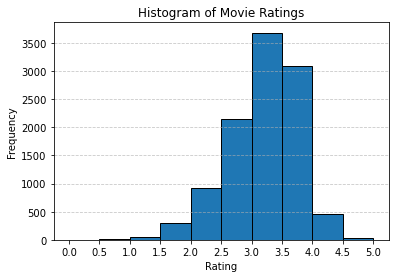

Time taken to create the histogram: 0.32 seconds


In [16]:
import matplotlib.pyplot as plt
start_time = time.time()


bin_edges = np.arange(0, 5.5, 0.5)  
plt.hist(combined_sorted_df["Rating"], bins=bin_edges, edgecolor="k")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Histogram of Movie Ratings")

plt.xticks(bin_edges)

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken to create the histogram: {elapsed_time:.2f} seconds")

# d.	Data contains more than 10M ratings of 10681 movies by 71567 users. Create histogram of number of times each movie got rated. Measure how much time it takes to create the histogram. 


In [17]:
movie_rating_counts = merged_df['MovieID'].value_counts()
movie_rating_counts

296      34864
356      34457
593      33668
480      32631
318      31126
         ...  
6085         1
60880        1
58595        1
58520        1
63662        1
Name: MovieID, Length: 10677, dtype: int64

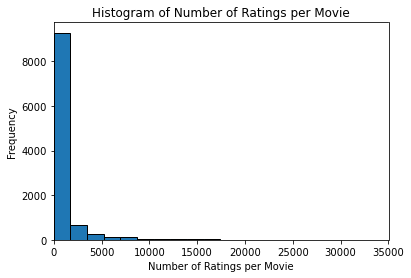

Time taken to create the histogram: 0.33 seconds


In [18]:
start_time = time.time()
plt.hist(movie_rating_counts, bins=20, edgecolor="k")
plt.xlabel("Number of Ratings per Movie")
plt.ylabel("Frequency")
plt.title("Histogram of Number of Ratings per Movie")

plt.xlim(0, 35000) 

plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken to create the histogram: {elapsed_time:.2f} seconds")

# e.	Choose the lowest three bins of histogram in part C and create a histogram of movie ratings for these three bins. Do the same thing for the top three bins of the histogram

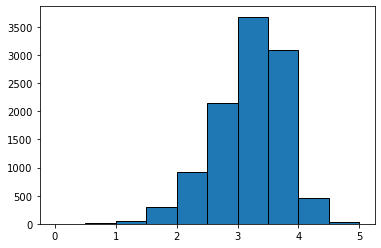

In [19]:
bin_edges = np.arange(0, 5.5, 0.5) 
hist, bins, _ = plt.hist(combined_sorted_df["Rating"], bins=bin_edges, edgecolor="k")

In [20]:
lowest_three_bins = [0,1,2]
highest_three_bins = [3,4,5]


In [21]:
lowest_three_data = combined_sorted_df[combined_sorted_df['Rating'].isin(lowest_three_bins)]
highest_three_data = combined_sorted_df[combined_sorted_df['Rating'].isin(highest_three_bins)]

Lowest 3 bins

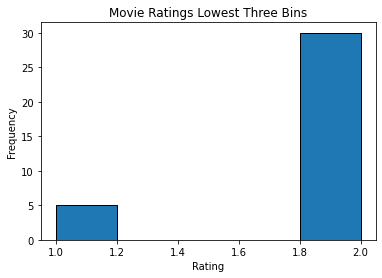

Processing time for Lowest Three Bins: 0.03294539451599121 seconds


In [22]:
start_time = time.time()
plt.hist(lowest_three_data['Rating'], bins=5, edgecolor='black')  

end_time = time.time()
histogram_time = end_time - start_time

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Movie Ratings Lowest Three Bins')
plt.show()

print(f"Processing time for Lowest Three Bins: {histogram_time} seconds")

Highest 3 bins

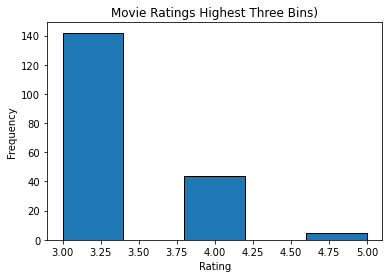

Processing time for Highest Three Bins: 0.0326383113861084 seconds


In [23]:
start_time = time.time()
plt.hist(highest_three_data['Rating'], bins=5, edgecolor='black')  

end_time = time.time()
histogram_time = end_time - start_time

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Movie Ratings Highest Three Bins)')
plt.show()

print(f"Processing time for Highest Three Bins: {histogram_time} seconds")